In [28]:
!pip install prophet



   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.1/13.3 MB 1.5 MB/s eta 0:00:09
    --------------------------------------- 0.2/13.3 MB 1.9 MB/s eta 0:00:08
    --------------------------------------- 0.3/13.3 MB 1.8 MB/s eta 0:00:08
    --------------------------------------- 0.3/13.3 MB 1.6 MB/s eta 0:00:08
   - -------------------------------------- 0.4/13.3 MB 1.7 MB/s eta 0:00:08
   - -------------------------------------- 0.5/13.3 MB 1.8 MB/s eta 0:00:08
   - -------------------------------------- 0.6/13.3 MB 1.8 MB/s eta 0:00:07
   -- ------------------------------------- 0.7/13.3 MB 1.9 MB/s eta 0:00:07
   -- ------------------------------------- 0.8/13.3 MB 1.9 MB/s eta 0:00:07
   -- ------------------------------------- 0.9/13.3 MB 2.0 MB/s eta 0:00:07
   -- ------------------------------------- 1.0/13.3 MB 1.9 MB/s eta 0:00:07
   --- ------------------------------------ 1.1/13.3 MB 1.9 MB/s eta 0:00:07
   ---

In [29]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [30]:
# Load the dataset (modify the path to your CSV file)
df = pd.read_csv('neometrics1.csv')



In [31]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])


In [32]:
# Rename columns to fit Prophet's expected format
df.rename(columns={'Date': 'ds', 'Tasks_Completed': 'y'}, inplace=True)

In [34]:
# Initialize the Prophet model
model = Prophet()


In [35]:
# Fit the model on the historical data
model.fit(df)


13:37:11 - cmdstanpy - INFO - Chain [1] start processing
13:37:12 - cmdstanpy - INFO - Chain [1] done processing


In [40]:
# Create a dataframe for future dates (e.g., for 365 days)
future = model.make_future_dataframe(periods=365)  # Remove 'df' argument

In [41]:
# Generate predictions
forecast = model.predict(future)


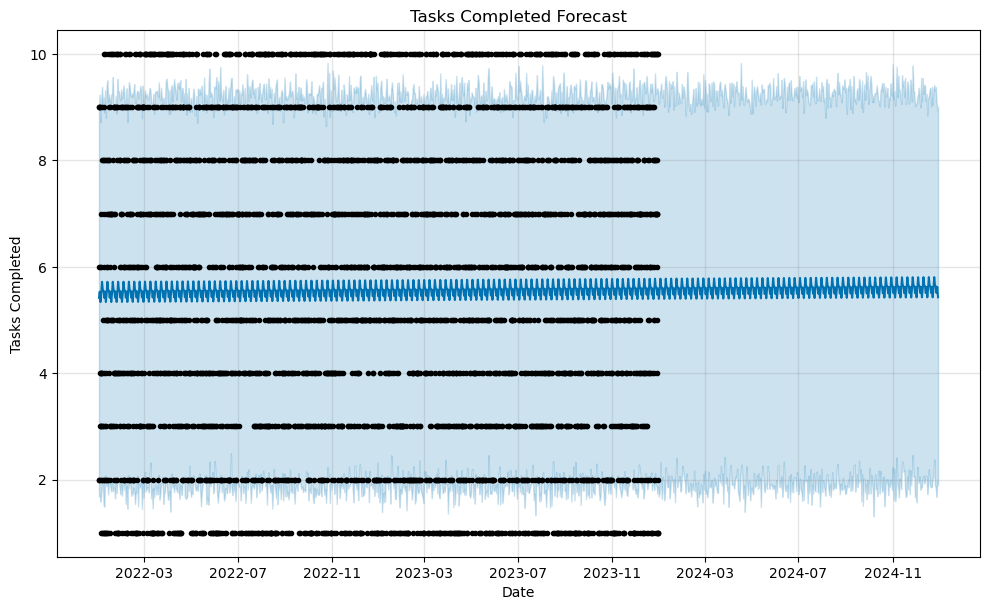

In [42]:
# Plot the results
model.plot(forecast)
plt.title("Tasks Completed Forecast")
plt.xlabel("Date")
plt.ylabel("Tasks Completed")
plt.show()

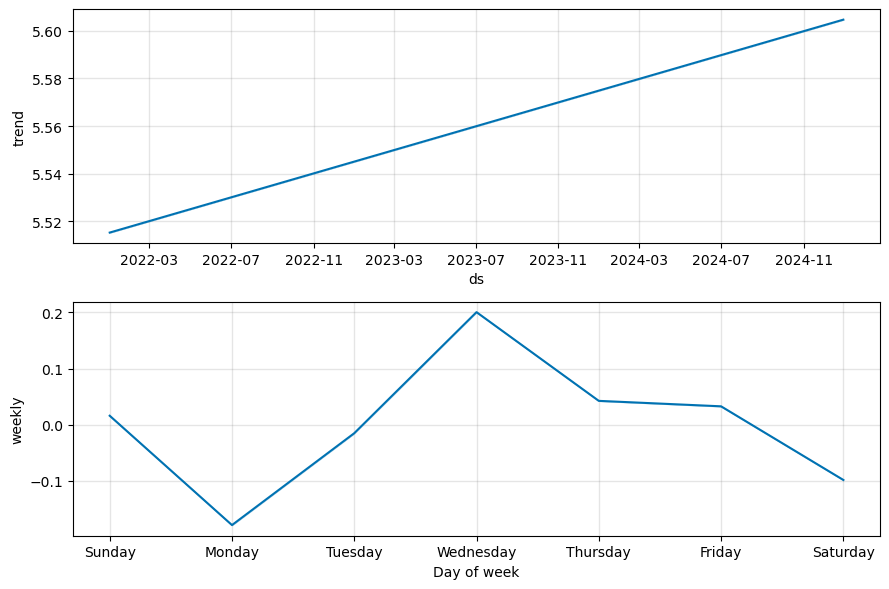

In [43]:
# Plot the components
model.plot_components(forecast)
plt.show()


In [44]:
# Display the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

             ds      yhat  yhat_lower  yhat_upper
1090 2024-12-26  5.646938    1.902202    9.315373
1091 2024-12-27  5.637306    1.843128    9.377285
1092 2024-12-28  5.506276    1.674031    9.116954
1093 2024-12-29  5.620691    1.960671    8.934643
1094 2024-12-30  5.426059    1.896052    9.012344
